# Demo Otsu

In [12]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from skimage import data, exposure, filters
from skimage import img_as_float

In [28]:
def demo_otsu(image):
    ths = np.arange(0,256,1)
    V = np.zeros(ths.shape)
    V0 = np.zeros(ths.shape)
    V1 = np.zeros(ths.shape)
    W = np.zeros(ths.shape)
    N = image.size

    for i, th in enumerate(ths):
        mask = (image>th)
        count1 = np.count_nonzero(mask)
        count0 = N-count1
        W[i]=count1/N
        if (count0>0):
            V0[i] = np.var(image[~mask])
        if (count1>0):
            V1[i] = image[mask].var()
        V[i] = (count0/N)*V0[i]+(count1/N)*V1[i]
    optid = np.argmin(V)
    H,_ = np.histogram(image.ravel(),np.append(ths, [256]),normed=True)

    fig, axes = plt.subplots(3,1,figsize=(8,6))
    axes[0].plot(ths,V0, 'b', label='var0 (left)')
    axes[0].plot(ths,V1, 'g', label='var1 (right)')
    axes[0].legend()

    axes[1].plot(ths,V, 'c', label='average var')
    axes[1].plot(ths[optid],V[optid], '*r')
    axes[1].legend()

    axes[2].plot(ths[:optid],H[:optid], 'b', label='hist (left)')
    axes[2].plot(ths[optid:],H[optid:], 'g', label='hist (right)')
    axes[2].axvline(ths[optid], ls='--', c='r')
    axes[2].legend()

    axes[0].set_title('Influence of threshold on Otsu criterion')

    print("minimum variance at th=",ths[optid])
    
    return ths[optid]

minimum variance at th= 87


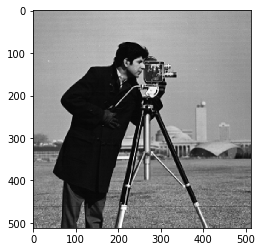

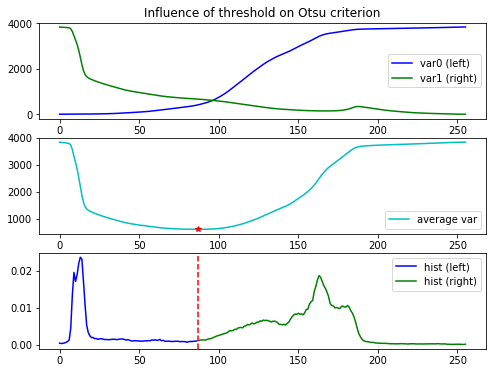

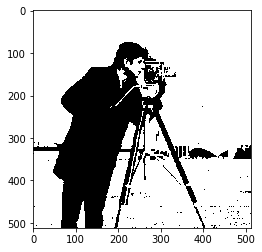

In [32]:
im = data.camera()
plt.imshow(im,cmap='gray')
th = demo_otsu(im)
fig=plt.figure()
plt.imshow(im>th,cmap='gray')

minimum variance at th= 107


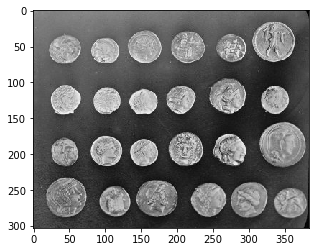

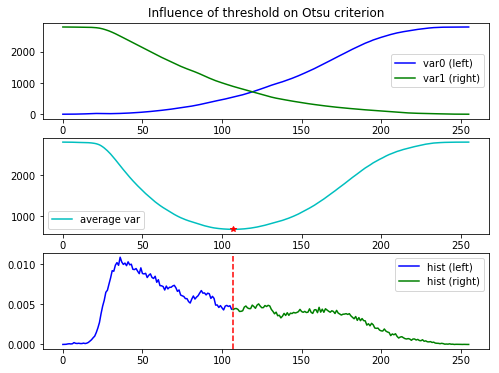

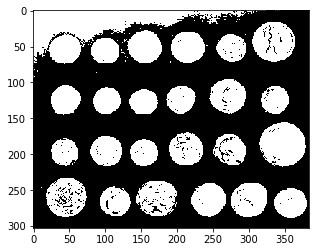

In [31]:
im = data.coins()
plt.imshow(im,cmap='gray')
th = demo_otsu(im)
fig=plt.figure()
plt.imshow(im>th,cmap='gray')

minimum variance at th= 157


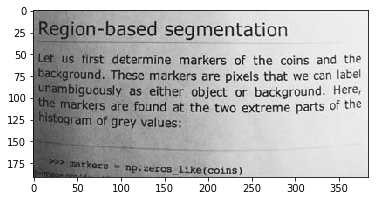

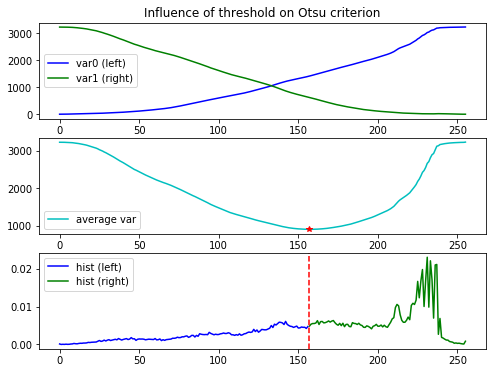

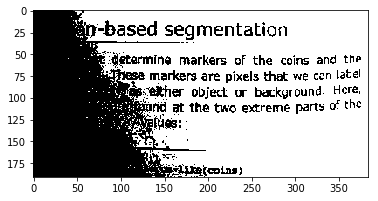

In [30]:
im = data.page()
plt.imshow(im,cmap='gray')
th = demo_otsu(im)
fig=plt.figure()
plt.imshow(im>th,cmap='gray')